In [ ]:
import pandas as pd
from sklearn.tree import _tree
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import accuracy_score


The link of the project : https://colab.research.google.com/drive/1oEObijZymV04ZqqLNPFz00llCA0ECzs8?usp=sharing

In [ ]:
df = pd.read_csv('/content/test_scores.csv')

In [ ]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [ ]:
df.dtypes

school              object
school_setting      object
school_type         object
classroom           object
teaching_method     object
n_student          float64
student_id          object
gender              object
lunch               object
pretest            float64
posttest           float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [ ]:
df.isna().any()

school             False
school_setting     False
school_type        False
classroom          False
teaching_method    False
n_student          False
student_id         False
gender             False
lunch              False
pretest            False
posttest           False
dtype: bool

In [ ]:
for i in  (df.columns):
  display(df[i].nunique())
  display(df[i].unique())

23

array(['ANKYI', 'CCAAW', 'CIMBB', 'CUQAM', 'DNQDD', 'FBUMG', 'GJJHK',
       'GOKXL', 'GOOBU', 'IDGFP', 'KFZMY', 'KZKKE', 'LAYPA', 'OJOBU',
       'QOQTS', 'UAGPU', 'UKPGS', 'UUUQX', 'VHDHF', 'VKWQH', 'VVTVA',
       'ZMNYA', 'ZOWMK'], dtype=object)

3

array(['Urban', 'Suburban', 'Rural'], dtype=object)

2

array(['Non-public', 'Public'], dtype=object)

97

array(['6OL', 'ZNS', '2B1', 'EPS', 'IQN', 'PGK', 'UHU', 'UWK', 'A33',
       'EID', 'HUJ', 'PC6', '1Q1', 'BFY', 'OMI', 'X6Z', '2AP', 'PW5',
       'ROP', 'ST7', 'XXJ', '197', '5LQ', 'JGD', 'HCB', 'NOR', 'X78',
       'YUC', 'ZDT', 'ENO', 'TSA', 'VA6', '18K', 'CXC', 'HKF', 'PBA',
       'U6J', 'W8A', '05H', '98D', 'G2L', 'P2A', 'XZM', '1VD', '21Q',
       '2BR', '3D0', '5JK', 'O6A', 'QTU', 'AJ1', 'J8J', 'RA5', '5SZ',
       '6U9', 'FS3', 'XJ8', '0N7', '3XJ', 'RK7', 'SUR', 'X2O', 'XZ4',
       '1SZ', '62L', 'NWZ', 'S98', '08N', '9AW', 'IPU', 'KXB', 'PGH',
       'XXE', '6C1', 'AE1', 'H7S', 'P8I', 'SSP', 'CD8', 'J6X', 'KR1',
       '341', 'D33', 'DFQ', 'GYM', 'IEM', '7BL', 'A93', 'TB5', 'YTB',
       '1UU', '4NN', 'V77', 'CII', 'Q0E', 'QA2', 'ZBH'], dtype=object)

2

array(['Standard', 'Experimental'], dtype=object)

18

array([20., 21., 18., 15., 16., 19., 17., 28., 27., 24., 14., 22., 23.,
       31., 25., 26., 29., 30.])

2133

array(['2FHT3', '3JIVH', '3XOWE', ..., 'YDR1Z', 'YUEIH', 'ZVCQ8'],
      dtype=object)

2

array(['Female', 'Male'], dtype=object)

2

array(['Does not qualify', 'Qualifies for reduced/free lunch'],
      dtype=object)

69

array([62., 66., 64., 61., 63., 60., 67., 57., 56., 58., 54., 59., 65.,
       55., 68., 73., 70., 74., 76., 69., 75., 78., 72., 71., 49., 53.,
       48., 52., 50., 46., 44., 51., 47., 43., 37., 40., 39., 41., 38.,
       45., 36., 42., 31., 35., 33., 27., 30., 34., 32., 29., 28., 23.,
       26., 77., 79., 82., 80., 85., 83., 84., 86., 89., 93., 88., 81.,
       87., 91., 22., 25.])

68

array([ 72.,  79.,  76.,  77.,  74.,  75.,  73.,  78.,  71.,  70.,  68.,
        66.,  65.,  67.,  63.,  69.,  82.,  87.,  80.,  83.,  81.,  84.,
        85.,  91.,  86.,  64.,  88.,  61.,  62.,  58.,  57.,  59.,  56.,
        60.,  55.,  54.,  49.,  53.,  52.,  50.,  51.,  48.,  39.,  43.,
        45.,  47.,  42.,  44.,  46.,  41.,  36.,  40.,  32.,  38.,  35.,
        34.,  93.,  90.,  92.,  97.,  95.,  99.,  89.,  94.,  96.,  98.,
       100.,  37.])

In [ ]:
correlations = df.corrwith(df.posttest)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending = False)

print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 pretest    0.950884
dtype: float64

Most Negative Correlations: 
 n_student   -0.504886
dtype: float64


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

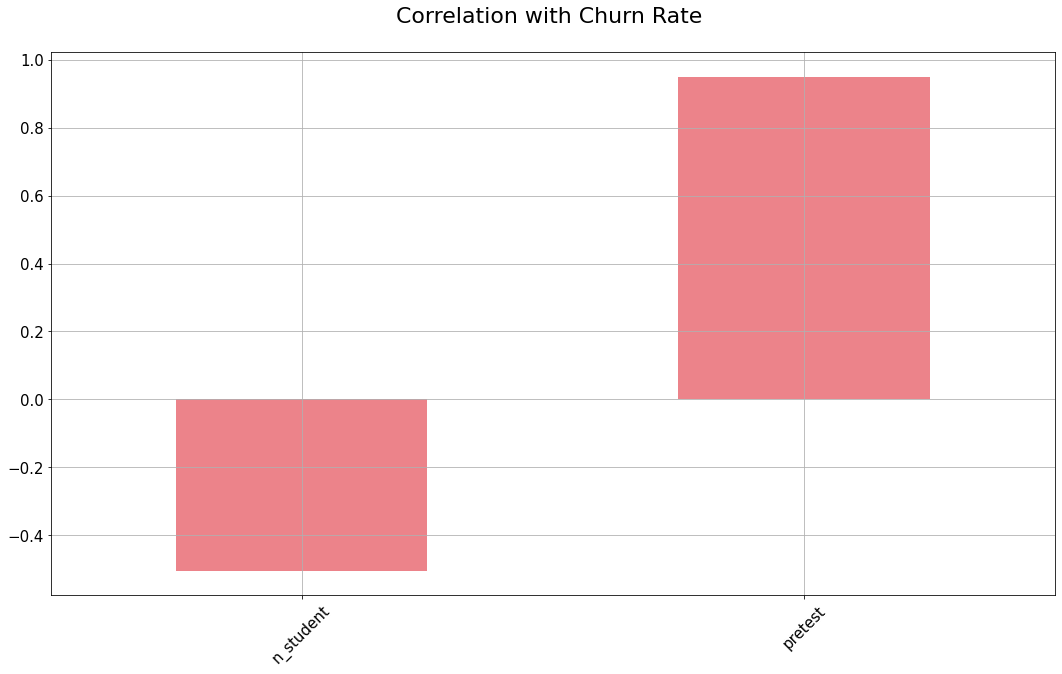

In [ ]:
correlations.plot.bar(
        figsize = (18, 10), fontsize = 15, color = '#ec838a',
        rot = 45, grid = True)

plt.title('Correlation with Posttest \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

In [ ]:
col_cat=df.select_dtypes(include=['object'])

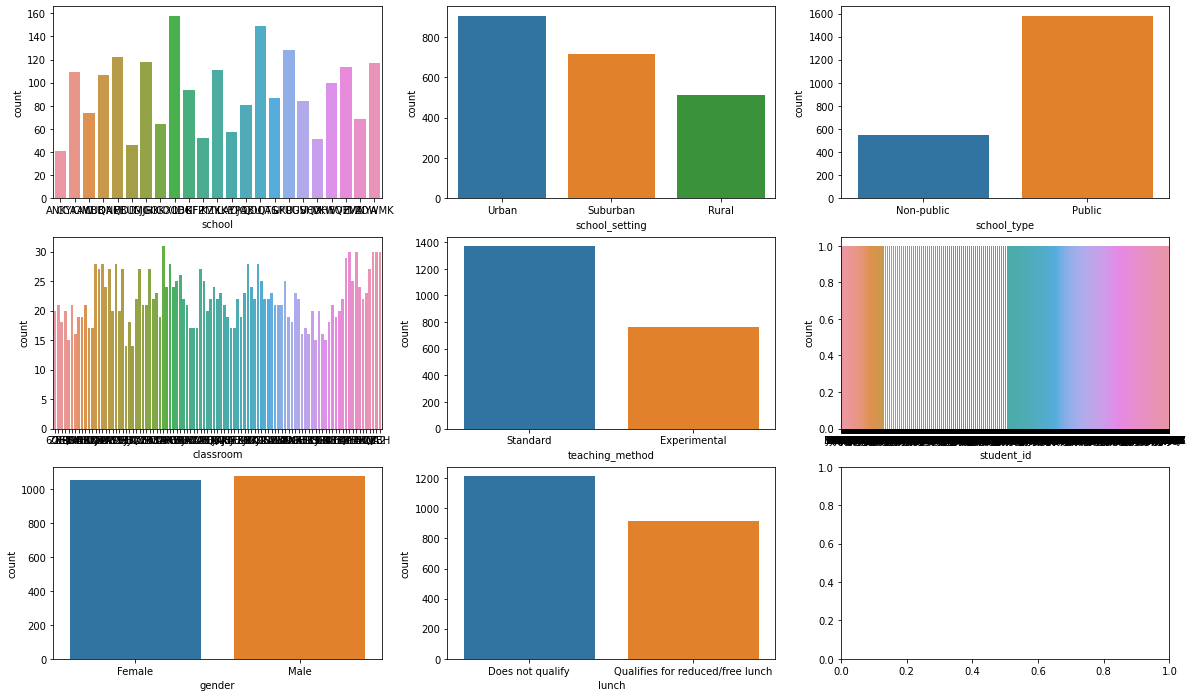

In [ ]:
import seaborn as sns
fig, axarr = plt.subplots(3, 3, figsize=(20, 12))
sns.countplot(x='school',data = df, ax=axarr[0][0])
sns.countplot(x='school_setting',data = df, ax=axarr[0][1])
sns.countplot(x='school_type',data = df, ax=axarr[0][2])
sns.countplot(x='classroom',data = df, ax=axarr[1][0])
sns.countplot(x='teaching_method',data = df, ax=axarr[1][1])
sns.countplot(x='student_id',data = df, ax=axarr[1][2])
sns.countplot(x='gender',data = df, ax=axarr[2][0])
sns.countplot(x='lunch',data = df, ax=axarr[2][1])


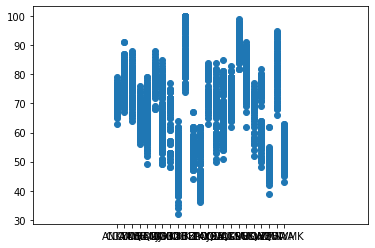

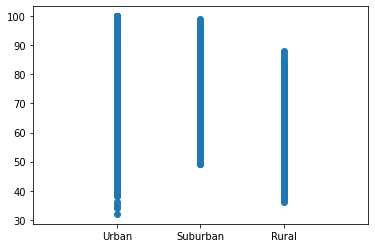

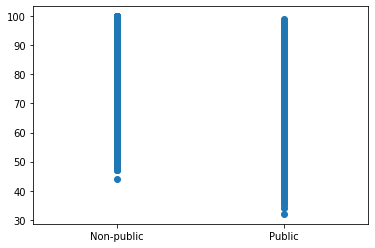

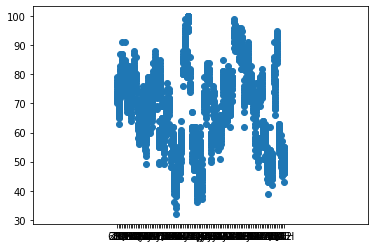

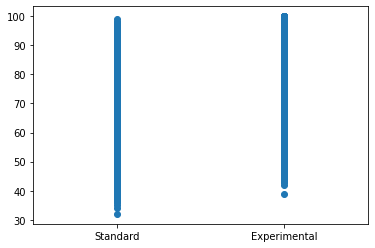

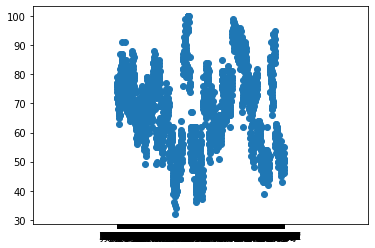

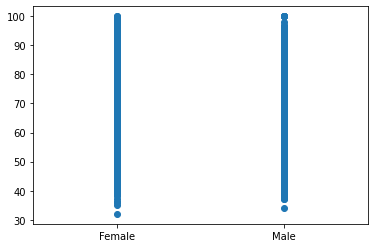

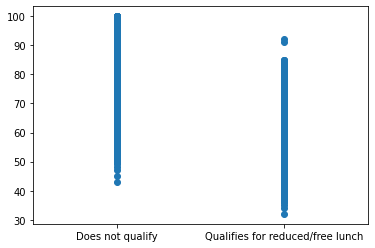

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
for t in (col_cat.columns):

  plt.scatter(df[t].astype(str), df["posttest"])
  plt.margins(x=0.5)
  plt.show()


In [ ]:
df = df.drop(columns = "student_id")  
col_cat = col_cat.drop(columns = "student_id") 
df = df.drop(columns = "school")  
col_cat = col_cat.drop(columns = "school") 
df = df.drop(columns = "classroom")  
col_cat = col_cat.drop(columns = "classroom") 

In [ ]:
def get_one_hot_encoding(dataframe, categorical_columns):
    enc_oh = OneHotEncoder(sparse=False)
    enc_oh.fit(dataframe[categorical_columns])
    category_columns = np.concatenate(enc_oh.categories_)
    encoded_features = enc_oh.transform(dataframe[categorical_columns])
    dataframe[category_columns] = pd.DataFrame(
        encoded_features,
        columns=category_columns,
        index=dataframe.index)
    return dataframe.drop(categorical_columns, axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder


df_new=get_one_hot_encoding(df,col_cat.columns)

In [ ]:
X = df_new.drop(['posttest'],axis=1)
y=df_new['posttest']
# Split as 60%-20%-20%
X_train, X_remaining,y_train, y_remaining= train_test_split(X,y, test_size=0.30,)
X_test, X_val,y_test, y_val = train_test_split(X_remaining,y_remaining, test_size=0.50)



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
p=[1,2,3,4]
train_MSE=[]
val_MSE=[]
for k in p:

  poly_reg = PolynomialFeatures(degree=k)
  X_poly_train = poly_reg.fit_transform(X_train)
  lin_reg_2 = LinearRegression()
  lin_reg_2.fit(X_poly_train, y_train)
  y_pred = lin_reg_2.predict(X_poly_train)
  
  train_MSE.append(mean_squared_error(y_train, y_pred))

  X_poly_valid = poly_reg.transform(X_val)
  y_pred = lin_reg_2.predict(X_poly_valid)

  val_MSE.append(mean_squared_error(y_val, y_pred))




In [ ]:
skor_df=[]
skor_df=pd.DataFrame(skor_df)
skor_df['p value']=p
skor_df['Traning MSE']=train_MSE
skor_df['Validation MSE']=val_MSE
display(skor_df)

,p value,Traning MSE,Validation MSE
0,1,9.985911,10.366453
1,2,9.687183,10.723963
2,3,8.907131,10.207663
3,4,7.889585,14.058138


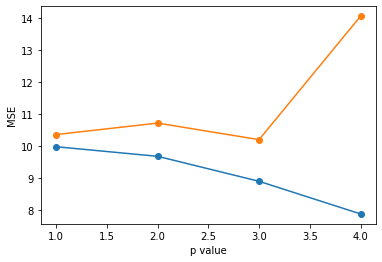

In [ ]:
fig,ax=plt.subplots()
ax.plot(skor_df['p value'], skor_df['Traning MSE'], marker="o")
ax.set_xlabel("p value")
ax.set_ylabel("MSE")
ax.plot(skor_df['p value'], skor_df['Validation MSE'], marker="o")
plt.show()

In [ ]:
poly_reg = PolynomialFeatures(degree=3)
X_poly_train = poly_reg.fit_transform(X_test)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_test)
y_pred = lin_reg_2.predict(X_poly_train)

MSE_son=mean_squared_error(y_test, y_pred)
print("MSE of final is = ",MSE_son)

MSE of final is =  7.230153331424077


The best p value is 3 since p value gives best performance for both validation and traning MSE. In other words, even MSE gets better when p value reachs 4 in traning data, then MSE of validation gets worse so we should consider both data to decide p value.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kVals = [2, 5, 10, 15]
train_MSE_KNN=[]
val_MSE_KNN=[]
for k in kVals:
  
 
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_train)
  train_MSE_KNN.append(mean_squared_error(y_train, y_pred))
  y_pred = model.predict(X_val)
  val_MSE_KNN.append(mean_squared_error(y_val, y_pred))
  
  

In [ ]:
skor_df_KNN=[]
skor_df_KNN=pd.DataFrame(skor_df_KNN)
skor_df_KNN['k value']=kVals
skor_df_KNN['Traning MSE']=train_MSE_KNN
skor_df_KNN['Validation MSE']=val_MSE_KNN
display(skor_df_KNN)

,k value,Traning MSE,Validation MSE
0,2,10.310114,19.165625
1,5,19.214334,24.978125
2,10,16.520429,17.784375
3,15,17.323510,18.259375


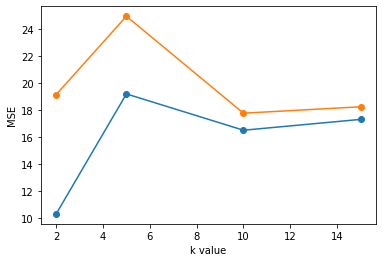

In [ ]:
fig,ax=plt.subplots()
ax.plot(skor_df_KNN['k value'], skor_df_KNN['Traning MSE'], marker="o")
ax.set_xlabel("k value")
ax.set_ylabel("MSE")
ax.plot(skor_df_KNN['k value'], skor_df_KNN['Validation MSE'], marker="o")
plt.show()

In [ ]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
TestAccuracy = accuracy_score(y_pred,y_test,)
print("Testing Accuracy = %.5f%%" % (TestAccuracy * 100), 'for k value= ',10)

Testing Accuracy = 8.12500% for k value=  10


In [ ]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
MSE_son=mean_squared_error(y_test, y_pred)
print("MSE of final is = ",MSE_son)


MSE of final is =  19.19375


The best k value is 10 since k value gives best performance for both validation and traning MSE. In other cases, the gap between traning MSE and validation MSE is eigher very high or they both higher.

**Report**

The data set consist of information about test that is written by students and there are 8 object and 2 numerical features with numerical label. Based on two models called Polynomial regression and KNN, It is asked to report hyperparameters and thier mean square error to determine best for both model. 

There were not any null value in the data set so it was okay to process futhere. Corelation between lable and numerical features are examined and they were okay for the model. Distribution of the categorial columns are ploted into graphs to determine useless feature. From the graphs it was easy to see that student ID was very unique for each student so that this feature was not useful. On the other hand, since my computer crashed several times due to RAM problem I had to drop classroom and school features as well. Then it was time to label these catagorical features with one-hot encoding.

We have obtained the best results with the KNN classifier (k value= 10), giving classification accuracy of 8.12 % on test data and MSE was 19.19 %. And, Polynomial regression model had best MSE of 7.23 % with p value = 3.

Finally, It seems like Polynomial regression model gives significantly better test results but both models should have been improved in order to achive a good model.